# Data Science Demo 'Diamonds Are Forever'

In [1]:
knitr::opts_chunk$set(echo = TRUE)

In the 2nd quarter of 2020 I took **[Codecademy's](https://www.codecademy.com/)** online *Learn R* training and was impressed by the possibilities to turn data into meaningful information. This is the presentation of my very first excercise using R to collect interesting and useful information from a dataset. <br> 
With a nod to James Bond's movie *Diamonds Are Forever* I chose the diamonds dataset with almost 54,000 records for this purpose. The solution in this Jupyter Notebook was converted from a Rmarkdown file (Rmd) using Jupytext. 

![Schematische weergave diamant](DDD/diamondAnatomy.jpg)

In [1]:
library(ggplot2)
library(dplyr)
library(readr)
library(DescTools)

diamonds <- read_csv("DDD/diamonds.csv")

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'DescTools' was built under R version 3.6.3"Parsed with column specification:
cols(
  carat = col_double(),
  cut = col_character(),
  color = col_character(),
  clarity = col_character(),
  depth = col_double(),
  table = col_double(),
  price = col_double(),
  x = col_double(),
  y = col_double(),
  z = col_double()
)


## Approach
1. using RStudio's RScript I programmed almost all *Codecademy* lectures including referenced datasets
2. created a RScript to play with operations on the `diamonds.csv` dataset. Some aspects return in this demo. Amongst others some basis statistical calculations. Variance and standard deviation are left as an excercise for the future.
3. generated a RMarkdown file with the intention to load the relevant RScripts. Perhaps due to lack of experience I just managed to import the libraries and reading the dataset.
4. after running all Rmd code I chose to render to HTML, Word and PDF (the latter after install of LaTeX).
5. 'porting' from RStudio's Rmarkup to Jupyter Notebook (R).

## Example of a scatter plot
As expected this scatter plot shows that the higher the carat values, the higher the diamond price is:

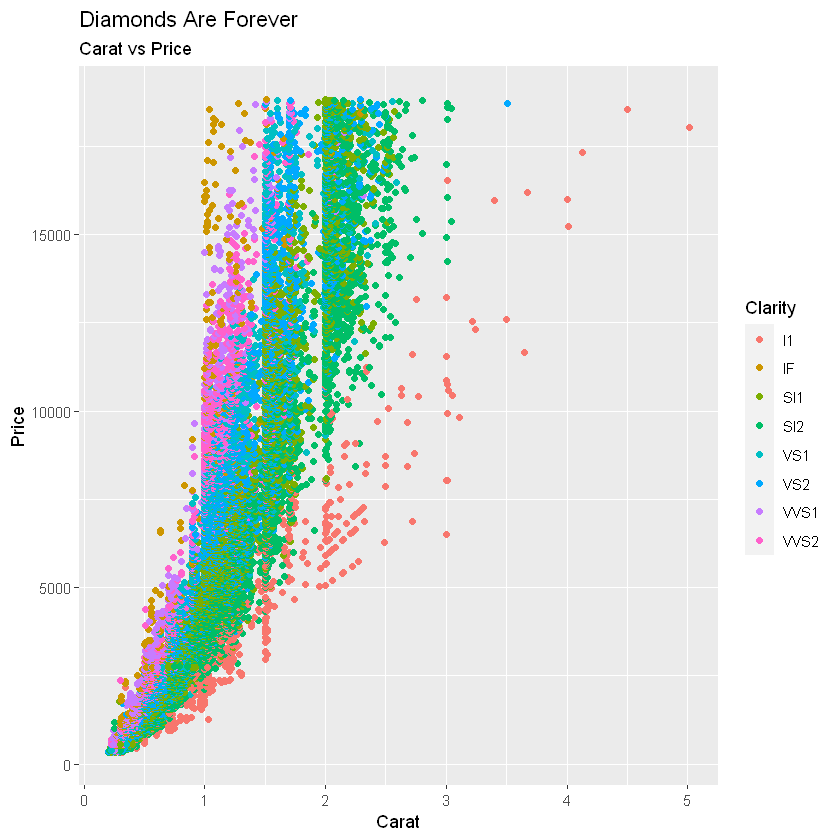

In [2]:
{echo = FALSE}
ggplot(data=diamonds, aes(x=carat, y=price)) + 
  geom_point(aes(color=clarity)) + labs(title="Diamonds Are Forever", subtitle="Carat vs Price", x="Carat", y="Price", color="Clarity")

## Example table presentation

In [3]:
{echo = FALSE } 
{ message=FALSE}
diamondsPerClarity <- diamonds %>% group_by(clarity) %>% summarize(count=n())
knitr::kable(diamondsPerClarity, caption = "Number of diamonds per clarity group")

`summarise()` ungrouping output (override with `.groups` argument)




Table: Number of diamonds per clarity group

|clarity | count|
|:-------|-----:|
|I1      |   741|
|IF      |  1790|
|SI1     | 13065|
|SI2     |  9194|
|VS1     |  8171|
|VS2     | 12258|
|VVS1    |  3655|
|VVS2    |  5066|

The same, but presented in a histogram (ggplot):

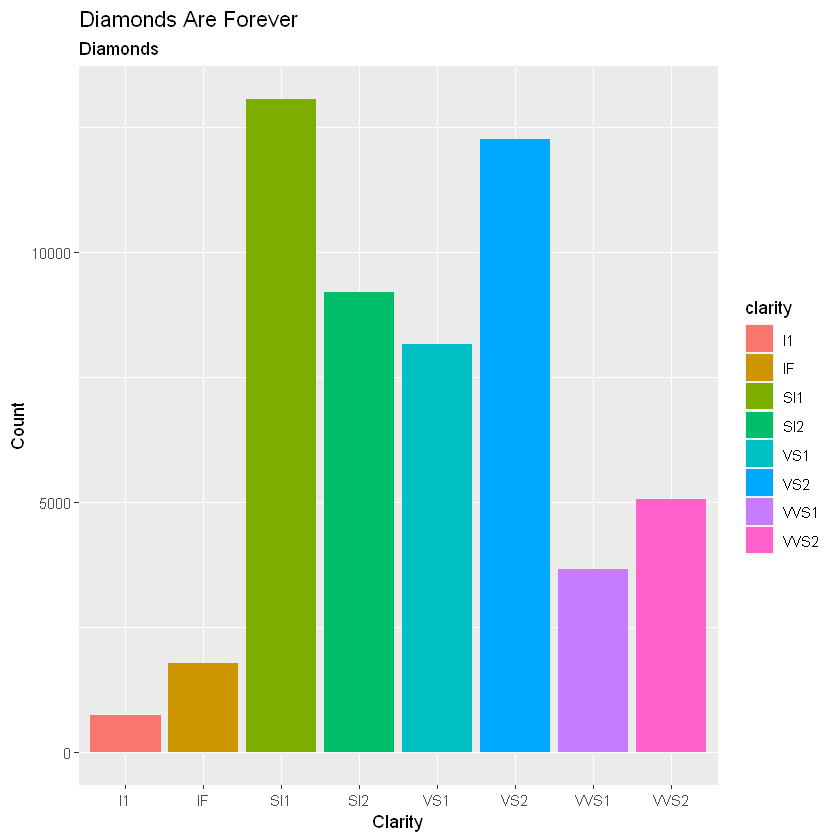

In [4]:
ggplot(diamonds, aes(x=clarity)) + geom_bar(aes(fill=clarity)) + labs(title="Diamonds Are Forever",subtitle="Diamonds", x="Clarity", y="Count")

In [5]:
{echo = FALSE}
{message=FALSE}
pricey_diamonds_clarity <- diamonds %>% group_by(clarity) %>% summarize(max_price = max(price,na.rm = TRUE))
knitr::kable(pricey_diamonds_clarity, caption = "Highest price per clarity group")

`summarise()` ungrouping output (override with `.groups` argument)




Table: Highest price per clarity group

|clarity | max_price|
|:-------|---------:|
|I1      |     18531|
|IF      |     18806|
|SI1     |     18818|
|SI2     |     18804|
|VS1     |     18795|
|VS2     |     18823|
|VVS1    |     18777|
|VVS2    |     18768|

In [6]:
{echo=FALSE} 
{message=FALSE}
average_price <- diamonds %>% group_by(clarity) %>% filter(cut == "Premium", carat >=1, carat <= 2) %>% summarize(mean(price,na.rm=TRUE))
knitr::kable(average_price, caption = "Average price per clarity group for cut Premium and carat values between 1 and 2")

`summarise()` ungrouping output (override with `.groups` argument)




Table: Average price per clarity group for cut Premium and carat values between 1 and 2

|clarity | mean(price, na.rm = TRUE)|
|:-------|-------------------------:|
|I1      |                  3718.648|
|IF      |                 10849.804|
|SI1     |                  6840.498|
|SI2     |                  5764.217|
|VS1     |                  9053.958|
|VS2     |                  8276.821|
|VVS1    |                 10599.228|
|VVS2    |                  9768.259|

The first 20 records. This example shows adding information to the dataset.

In [7]:
diff_from_mean <- diamonds %>% group_by(clarity) %>% mutate(diff_with_average = price - mean(price, na.rm = TRUE))
knitr::kable(diff_from_mean[1:20, ], caption = "Difference with average price per clarity group")



Table: Difference with average price per clarity group

| carat|cut       |color |clarity | depth| table| price|    x|    y|    z| diff_with_average|
|-----:|:---------|:-----|:-------|-----:|-----:|-----:|----:|----:|----:|-----------------:|
|  0.23|Ideal     |E     |SI2     |  61.5|    55|   326| 3.95| 3.98| 2.43|         -4737.029|
|  0.21|Premium   |E     |SI1     |  59.8|    61|   326| 3.89| 3.84| 2.31|         -3670.001|
|  0.23|Good      |E     |VS1     |  56.9|    65|   327| 4.05| 4.07| 2.31|         -3512.455|
|  0.29|Premium   |I     |VS2     |  62.4|    58|   334| 4.20| 4.23| 2.63|         -3590.989|
|  0.31|Good      |J     |SI2     |  63.3|    58|   335| 4.34| 4.35| 2.75|         -4728.029|
|  0.24|Very Good |J     |VVS2    |  62.8|    57|   336| 3.94| 3.96| 2.48|         -2947.737|
|  0.24|Very Good |I     |VVS1    |  62.3|    57|   336| 3.95| 3.98| 2.47|         -2187.115|
|  0.26|Very Good |H     |SI1     |  61.9|    55|   337| 4.07| 4.11| 2.53|         -3659.001|
| 

## Some descriptive statistics values
Histogram showing diamond depth with mean, median and mode (ggplot):

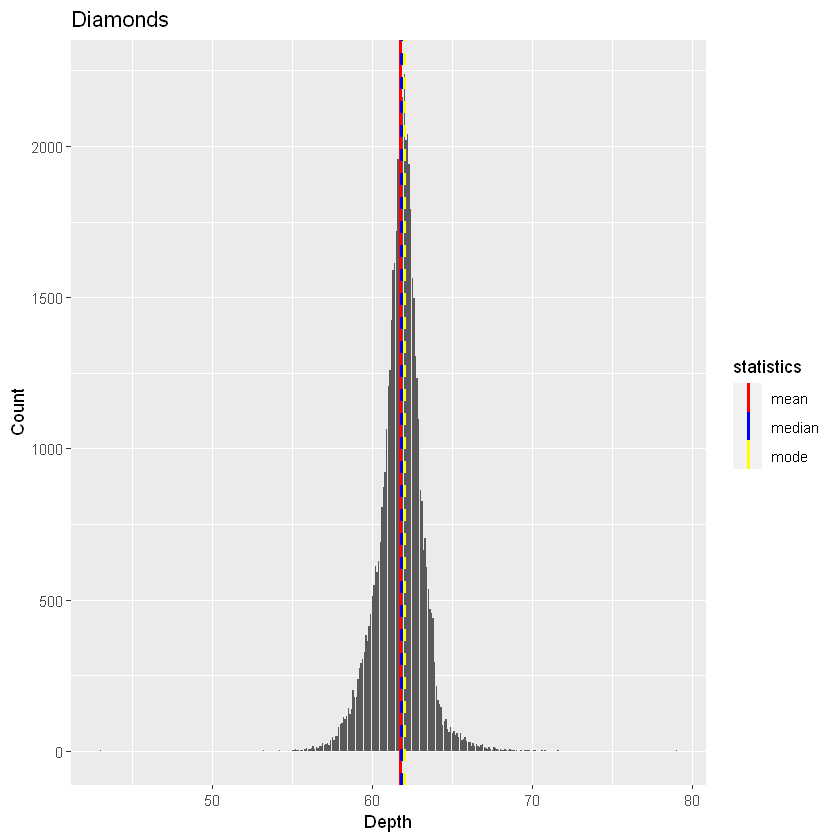

In [8]:
{echo=FALSE}
ggplot(diamonds, aes(x=depth)) + geom_bar(aes(fill=depth)) + labs(title="Diamonds", x="Depth", y="Count") +
  geom_vline(aes(xintercept=mean(diamonds$depth),
                 color="mean"), linetype="solid",
             size=1) +
  geom_vline(aes(xintercept=median(diamonds$depth),
                 color="median"), linetype="dashed",
             size=1) +
  geom_vline(aes(xintercept=Mode(diamonds$depth),
                 color="mode"), linetype="dashed",
             size=1) +
  scale_color_manual(name = "statistics", values = c(median = "blue", mean = "red", mode = "yellow"))

Histogram showing diamond depth with mean, median and mode (using qplot):

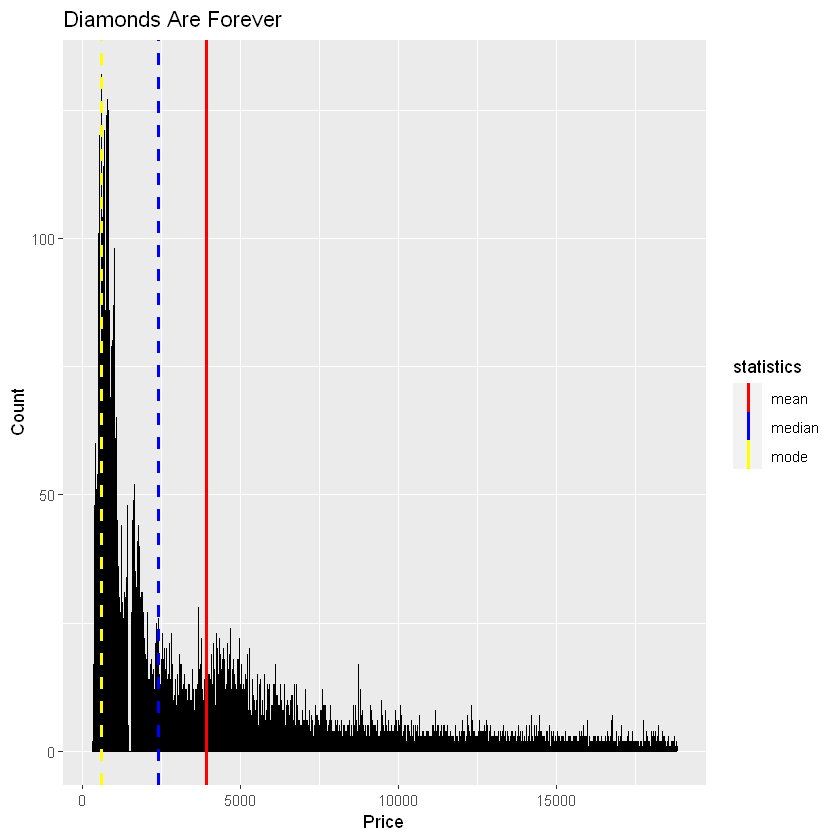

In [9]:
qplot(diamonds$price,
              geom='histogram',
              binwidth = 0.1,  
              main = 'Diamonds Are Forever', 
              xlab = 'Price',
              ylab = 'Count',
              fill=I("blue"), 
              col=I("black"), 
              alpha=I(.2)) +
  geom_vline(aes(xintercept=mean(diamonds$price),
                 color="mean"), linetype="solid",
             size=1) +
  geom_vline(aes(xintercept=median(diamonds$price),
                 color="median"), linetype="dashed",
             size=1) +
  geom_vline(aes(xintercept=Mode(diamonds$price),
                 color="mode"), linetype="dashed",
             size=1) +
  scale_color_manual(name = "statistics", values = c(median = "blue", mean = "red", mode = "yellow"))

In [10]:
diamondsCount <- filter(diamonds, between(diamonds$price, 0, 1000)) %>% summarise(count=n())
knitr::kable(diamondsCount, caption = "Number of low priced diamonds (< 1000,00) ")



Table: Number of low priced diamonds (< 1000,00) 

| count|
|-----:|
| 14524|